# **MEHWISH ZAMAN (DATAT ANALYST)**
  AS INTERN AT OASIS INFOBYTE


  **PROJECT_2 PROPOSAL** ( LEVEL_2)
  

# **Idea: Wine Quality Prediction**
 **Description:**

 The focus is on predicting the quality of wine based on its chemical characteristics, offering a
real-world application of machine learning in the context of viticulture. The dataset
encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.

**Key Concepts and Challenges:**

1. Classifier Models: Utilizing Random Forest, Stochastic Gradient Descent, and Support Vector Classifier (SVC) for wine quality prediction.
2. Chemical Qualities: Analyzing features like density and acidity as predictors for wine quality.
3. Data Analysis Libraries: Employing Pandas for data manipulation and Numpy for array operations.
4. Data Visualization: Using Seaborn and Matplotlib for visualizing patterns and insights in the dataset.

In [ ]:
# IMPORTING LIBRARIES.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
!unzip /content/LEVEL_2_PROJECT_2.zip

Archive:  /content/LEVEL_2_PROJECT_2.zip
replace WineQT.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# LOADING DATA.
df = pd.read_csv('/content/WineQT.csv')

In [ ]:
# DATA FIRST LOOK.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.shape

(1143, 13)

In [ ]:
# DATA INFORMATION.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
# DATA STATISTICS.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
# CHECKING NULL VALUES.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

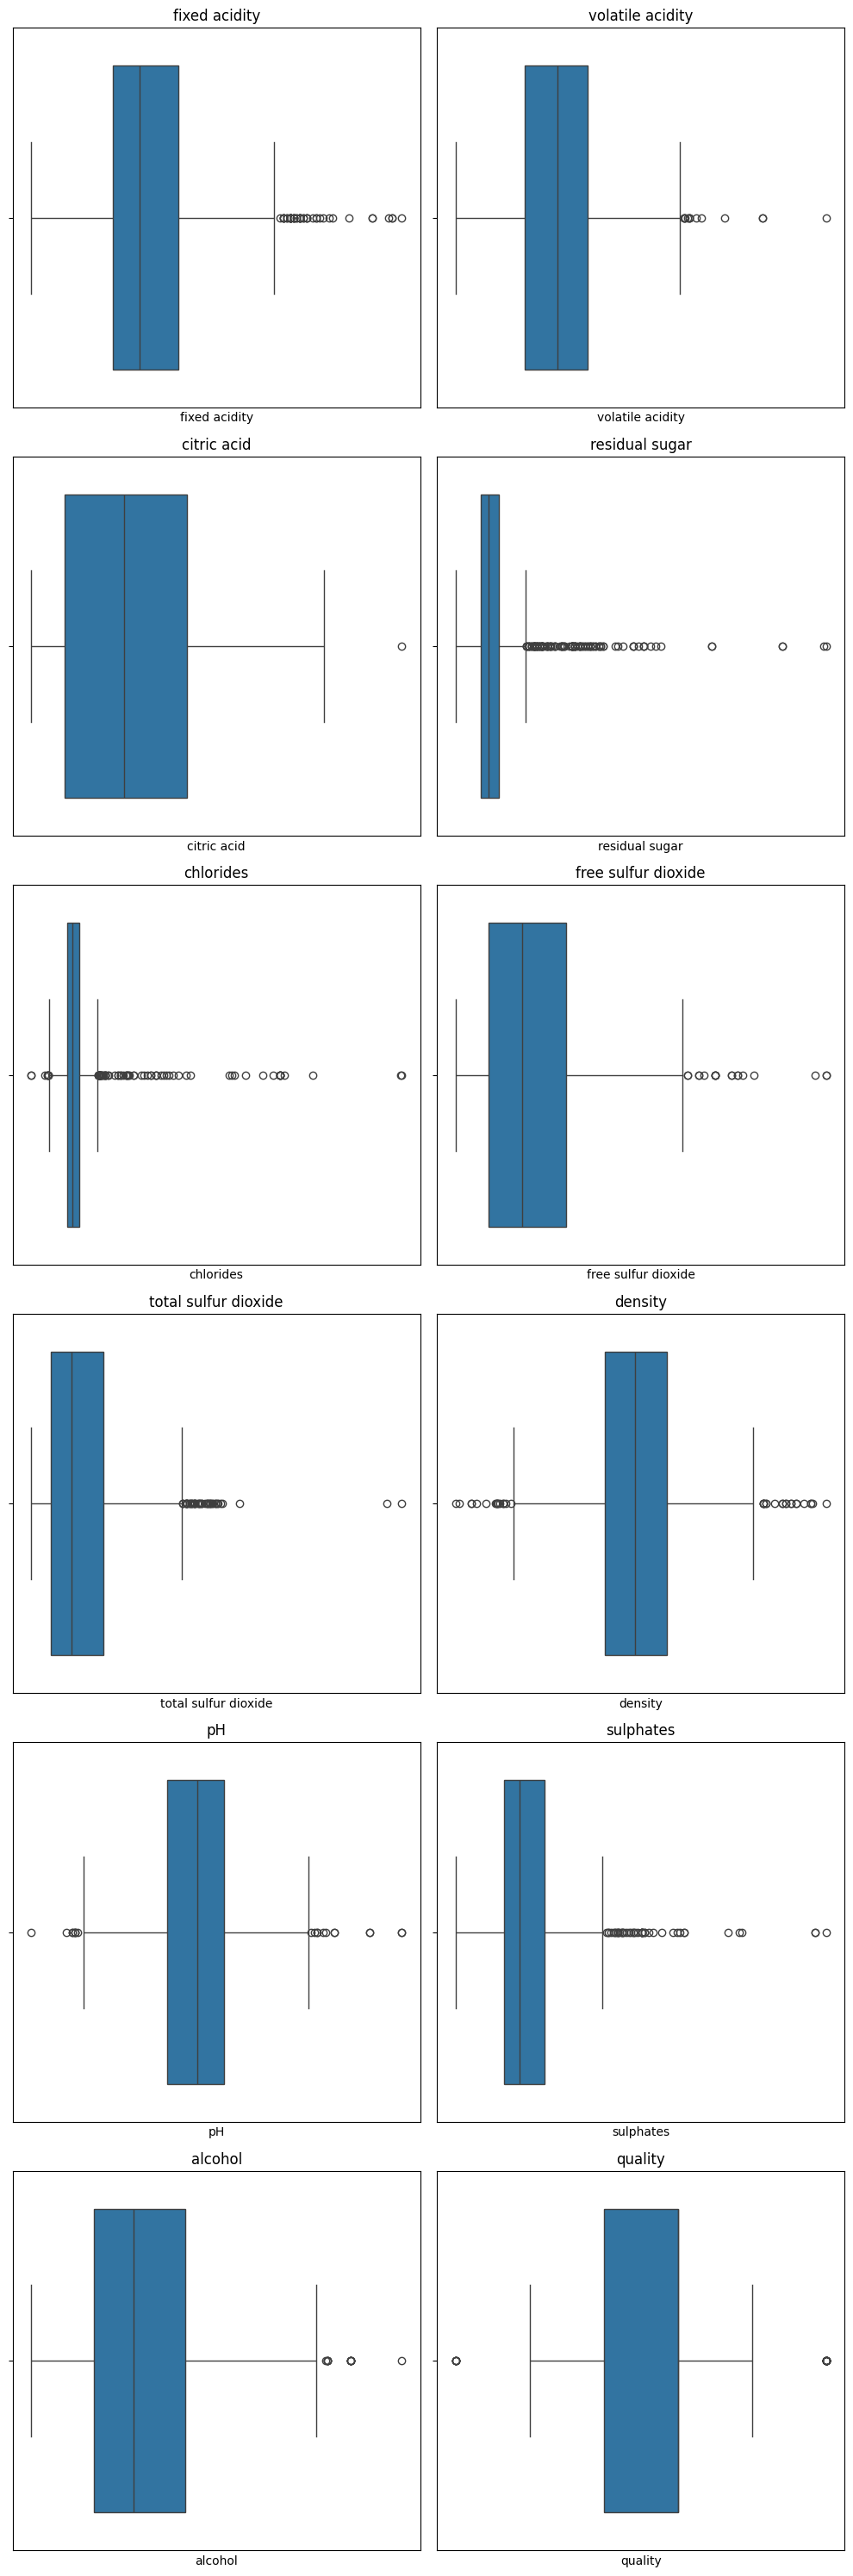

In [ ]:
# CHECKING FOR OUTLIERS.
input_columns = df.columns[:-1].tolist()  # Exclude the last column

# Set up subplots
num_columns = len(input_columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows))
axes = axes.flatten()

# Plot box plots for each selected variable
for i, column in enumerate(input_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xticks([])  # Remove existing x-axis ticks
    axes[i].set_xticklabels([])  # Remove existing x-axis tick labels
    axes[i].tick_params(axis='x', rotation=90)  # Set the rotation angle

# Remove empty subplots, if any
for j in range(num_columns, num_rows * 2):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Tukey's Method for identifying outliers and replace them with the mean
# Assuming df is your DataFrame
input_columns = df.columns[:-1].tolist()  # Exclude the last column

# Function to replace outliers with mean using Tukey's Method
def replace_outliers_with_mean_tukey(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].mean(), data[column])

# Replace outliers with mean using Tukey's Method for each numerical column
for column in input_columns:
    if np.issubdtype(df[column].dtype, np.number):  # Check if the column is numeric
        replace_outliers_with_mean_tukey(df, column)

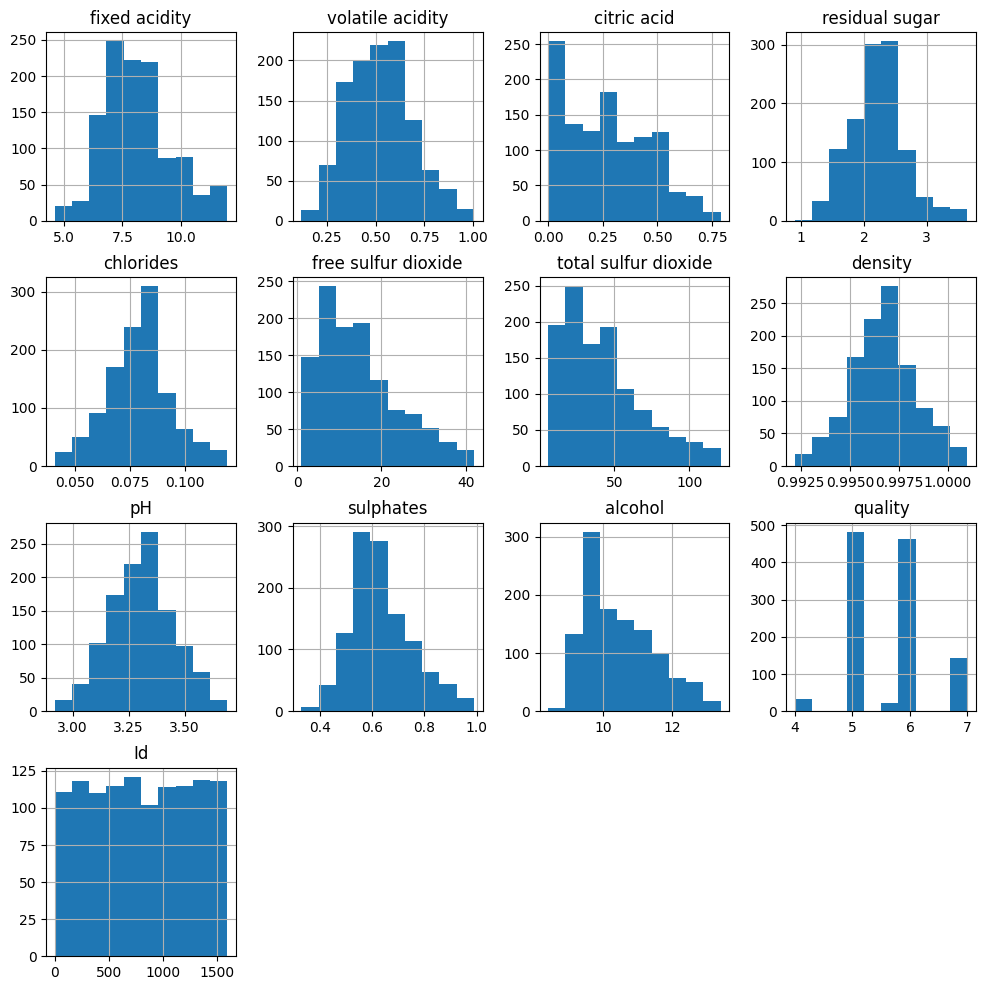

In [ ]:
# Histograms
df.hist(bins=10,figsize=(12, 12))
plt.show()


In [ ]:
# Create pivot_table
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_pivot_table = df.pivot_table(colum_names,
               ['quality'], aggfunc='median')
print(df_pivot_table)

          alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                              
4.000000    10.00     0.0780        0.070  0.996640       7.600000   
5.000000     9.70     0.0820        0.230  0.996890       7.800000   
5.657043    11.15     0.0735        0.420  0.996565       8.105556   
6.000000    10.50     0.0790        0.245  0.996595       7.900000   
7.000000    11.50     0.0740        0.400  0.996040       8.311111   

          free sulfur dioxide     pH  residual sugar  sulphates  \
quality                                                           
4.000000                 12.0  3.360             2.1       0.56   
5.000000                 14.0  3.300             2.2       0.58   
5.657043                  6.0  3.235             2.1       0.69   
6.000000                 14.0  3.320             2.2       0.64   
7.000000                 12.0  3.270             2.3       0.73   

          total sulfur dioxide  volatil

In [ ]:
#Check for correlation between variables in the dataset
corr_matrix = df.corr()
print(corr_matrix["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.456520
sulphates               0.387878
citric acid             0.231061
fixed acidity           0.111535
Id                      0.090490
residual sugar          0.022308
pH                     -0.045200
free sulfur dioxide    -0.053477
density                -0.148231
chlorides              -0.158145
total sulfur dioxide   -0.192150
volatile acidity       -0.370029
Name: quality, dtype: float64


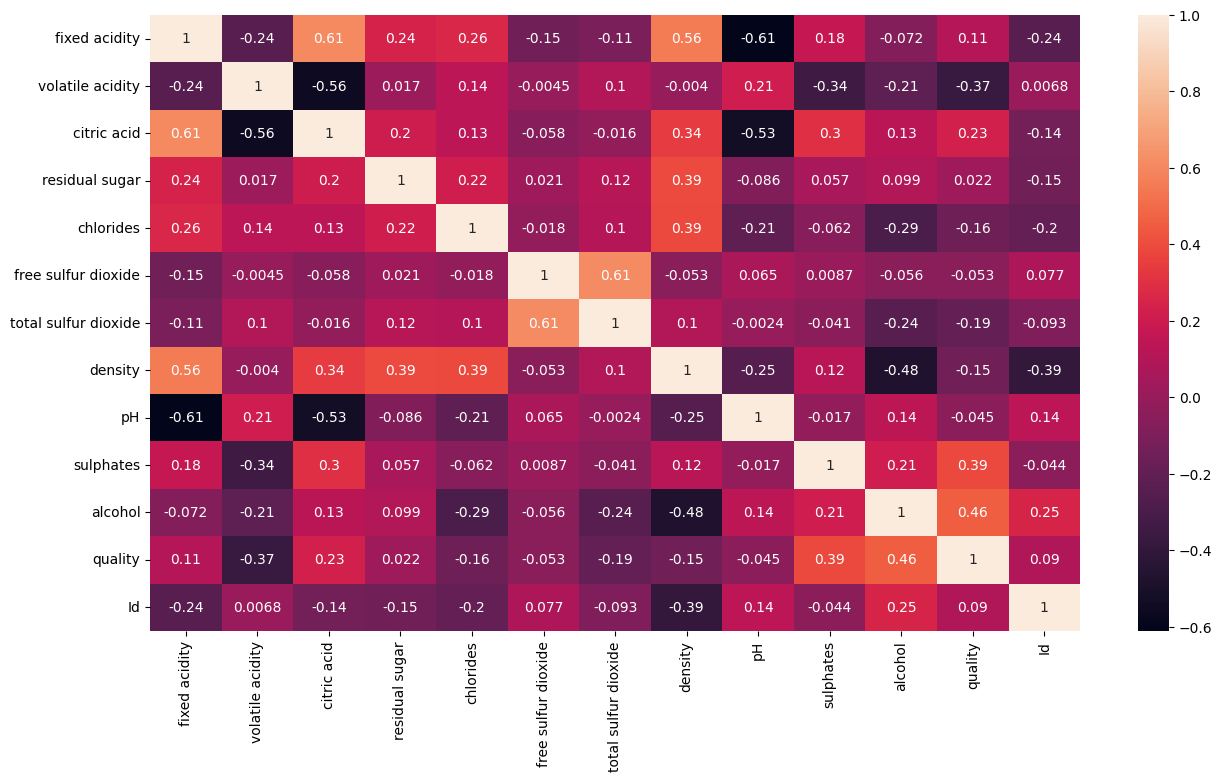

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True);

<Axes: xlabel='quality', ylabel='fixed acidity'>

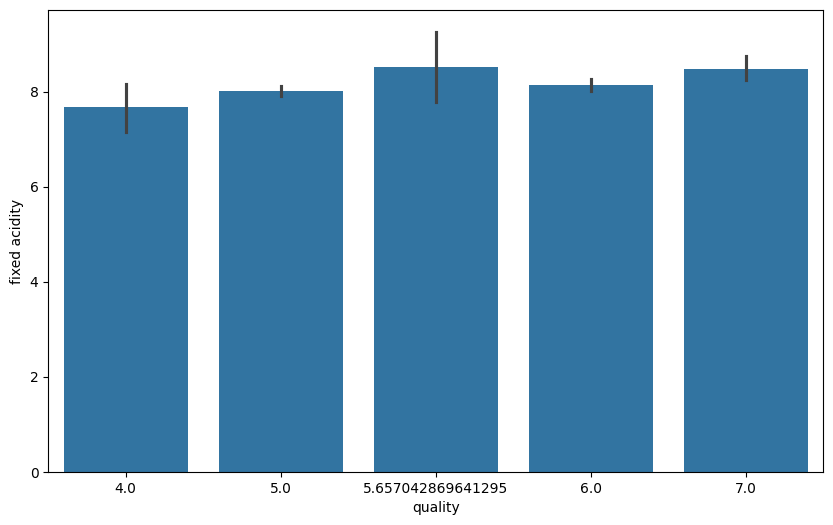

In [ ]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

In [ ]:
!pip install scikit-learn

In [ ]:
# importing libraries.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
print(rf_model)

RandomForestClassifier(random_state=42)


In [ ]:
# Separate features and target variable
X = df.drop("quality", axis=1)
y = df["quality"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Build and Evaluate Random Forest Model:**

In [ ]:
# Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate model performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)


Random Forest Accuracy: 0.6812227074235808
Random Forest Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Build and Evaluate SGD Model:**

In [ ]:
# Define and train the SGD model
sgd_model = SGDClassifier(max_iter=1000, random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)

# Evaluate model performance
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
sgd_report = classification_report(y_test, sgd_predictions)

print("SGD Accuracy:", sgd_accuracy)
print("SGD Classification Report:\n", sgd_report)


SGD Accuracy: 0.5327510917030568
SGD Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.74      0.33      0.46        96
           6       0.48      0.91      0.63        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.25      0.25      0.22       229
weighted avg       0.52      0.53      0.47       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Build and Evaluate SVC Model:**

In [ ]:
# Define and train the SVC model
svc_model = SVC(kernel="linear", random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_predictions = svc_model.predict(X_test)

# Evaluate model performance
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_report = classification_report(y_test, svc_predictions)

print("SVC Accuracy:", svc_accuracy)
print("SVC Classification Report:\n", svc_report)


SVC Accuracy: 0.6375545851528385
SVC Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.76      0.72        96
           6       0.61      0.67      0.64        99
           7       0.47      0.27      0.34        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
